In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

train = pd.read_csv("C:/Users/crist/Desktop/Proyect_RegressionLogistic_Titanic/train.csv")
df_test=pd.read_csv("C:/Users/crist/Desktop/Proyect_RegressionLogistic_Titanic/test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.drop([889,890],inplace=True)

In [4]:
train.isnull().tail() # obtenemos una matrix boleana donde se muestra datos nulos 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,False,False,False,False,False,False,False,False,False,False,True,False
885,False,False,False,False,False,False,False,False,False,False,True,False
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

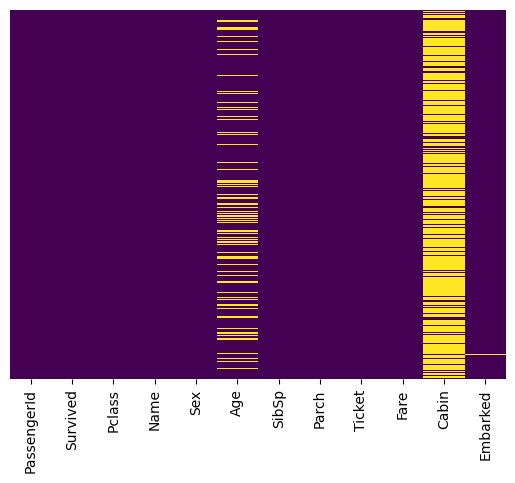

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # eliminamos eje Y , leyenda de las barras

<Axes: xlabel='Survived', ylabel='count'>

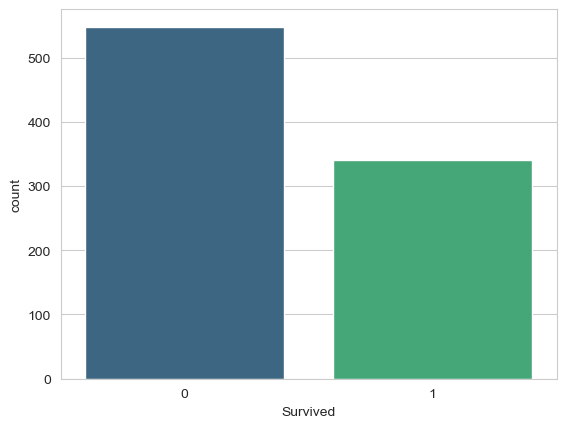

In [6]:
sns.set_style('whitegrid') # Estilo de la grilla 
sns.countplot(x='Survived',data=train,palette='viridis') 

<Axes: xlabel='Survived', ylabel='count'>

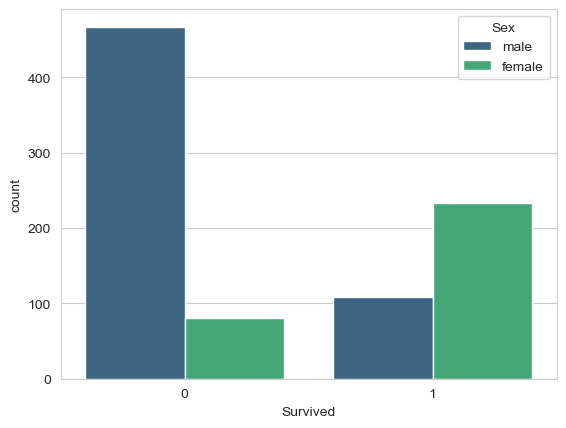

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='viridis') # si deseamos hacer un matizado con el genero 

ANALISIS POR GENERO:
De manera global podemos observar que la mayoria de personas que no sobrevivieron eran hombres, ademas de las personas que sobrevivieron mas de la mitad eran mujeres.

In [8]:
# Ahora hagamos el mismo analisis pero con la clase social


<Axes: xlabel='Survived', ylabel='count'>

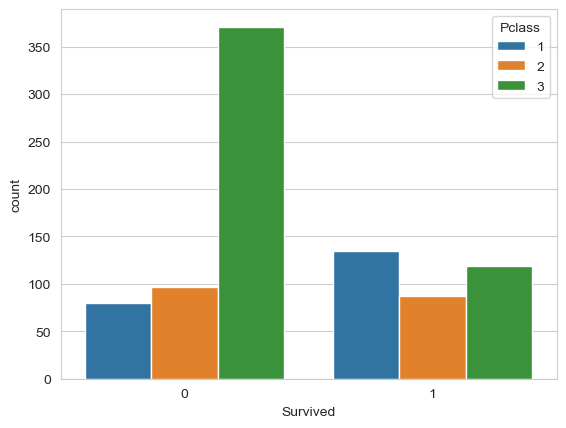

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train)


ANALISIS POR CLASE SOCIAL:
En este grafico podemos observar que en su mayoria las personas que no sobrevivieron pertenecian a la tercera clase, en las personas que sobrevivieron se encuentra un equilibrio aproximado, sin embargo con una ligera tendecia a las personas de primera clase y tercera clase

In [10]:
train['Pclass'].value_counts() # Para evaluar el numero de pasajeros de la muestra 

3    490
1    215
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

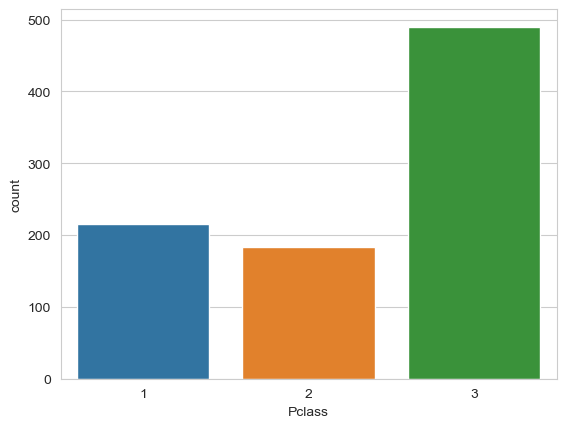

In [11]:
sns.countplot(x='Pclass',data=train)

LIMPIEZA DE DATOS
Debemos priorizar la edad por medio de un diagrama de cajas y de esa manera observar e promedio de la edad por clase social

<Axes: xlabel='Pclass', ylabel='Age'>

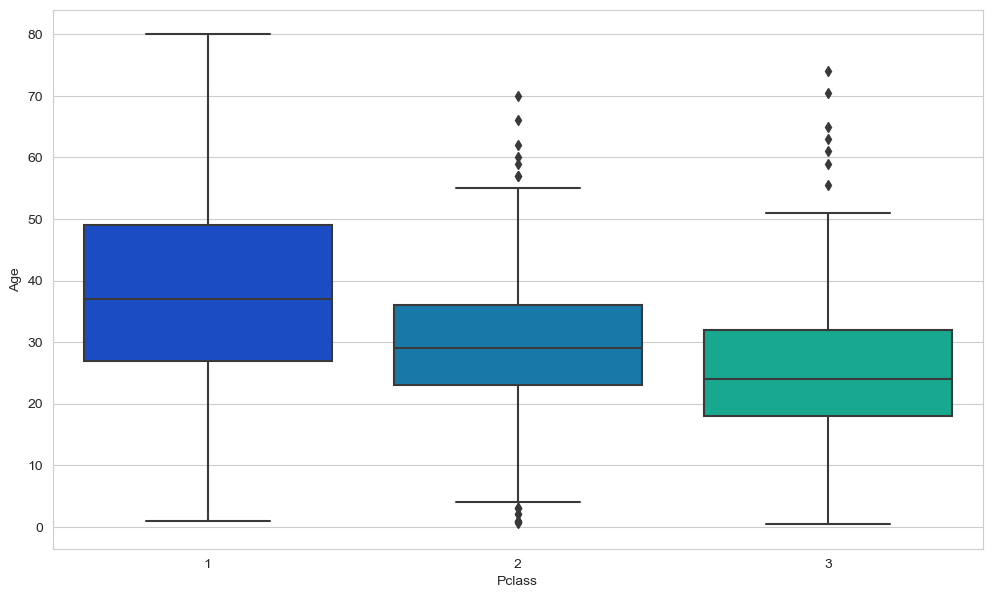

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Analisis :
Podemos observar que la edad promedio por clase social es :

1ra clase la edad promedio es 37 años aprox.
2da clase la edad promedio es 29 años aprox.
3ra clase la edad promedio es 24 años aprox.

In [13]:
# Creamos la funcion de imputacion de datos para la edad

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Aplicamos la funcion para limpiar datos de edad y actualizarlos

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [15]:
# Aplicamos nuevamente el heatmap para verificar si los datos fueron limpiados correctamente

<Axes: >

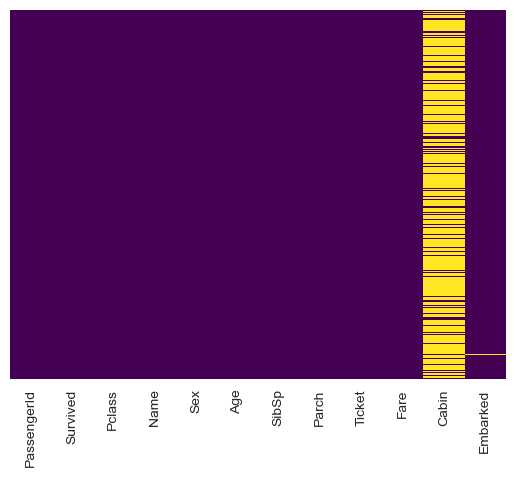

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # de esta manera se observa los missing Data

In [17]:
# como podemos analizar hay muchos datos faltantes en las cabinas y quizas no sea un informacion importante
# entonces lo que hacemos es suprimir esta columna 

In [18]:
train.drop('Cabin',axis=1,inplace=True) # recordar que el implace es para hacer un guardado definitivo

<Axes: >

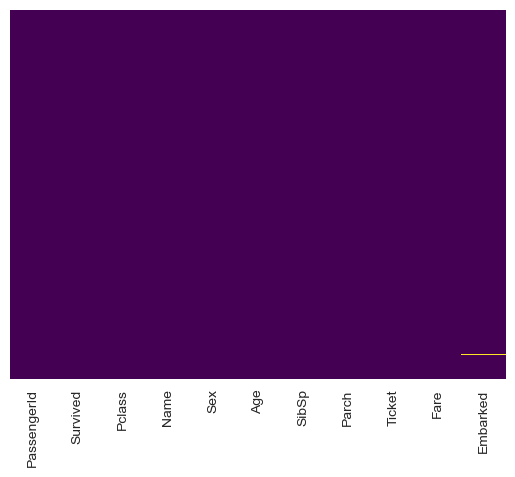

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # de esta manera se observa los missing Data

Retiro de las variables que no tienen importancia para nuestra prediccion
Realizamos el retiro de las variables que no tienen importancia dentro del estudio o no son numericos

In [21]:
train.drop(['Name','Embarked','SibSp','Ticket','Parch','Fare','Age'],axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex
0,1,0,3,male
1,2,1,1,female
2,3,1,3,female
3,4,1,1,female
4,5,0,3,male


Conversion de las variables categoricas
Tendremos que convertir características categóricas a variables ficticias utilizando pandas! De lo contrario, nuestro algoritmo de aprendizaje automático no podrá tomar directamente esas características como entradas

In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True) # con pandas caracterizamos las variables categoricas
#clase = pd.get_dummies(train['Pclass'],drop_first=True) # con pandas caracterizamos las variables categoricas

In [24]:
train = pd.concat([train,sex],axis=1)  # Realizamos concatenación para ingresar las variables convertidas

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,male
0,1,0,3,male,1
1,2,1,1,female,0
2,3,1,3,female,0
3,4,1,1,female,0
4,5,0,3,male,1


In [26]:
train.drop(['Sex'],axis=1,inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,male
0,1,0,3,1
1,2,1,1,0
2,3,1,3,0
3,4,1,1,0
4,5,0,3,1


Sobrevivientes por clases ( porcentaje %)

In [28]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.627907
1,2,0.472826
2,3,0.242857


CONSTRUIR EL MODELO DE REGRESIÓN:
Una vez ya tengamos nuestros datos caracterizados y limpios , procedemos a dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba

In [29]:
X=train.drop('Survived',axis=1)
y=train['Survived'] 
X_test  = df_test.drop("PassengerId",axis=1).copy()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.47, random_state=101)

Predicción

In [32]:
from sklearn.linear_model import LogisticRegression 

In [33]:
lrmodel = LogisticRegression() # Creamos la instancia
lrmodel.fit(X_train,y_train)   # Ajustamos el modelo con los datos de entrenamiento

LogisticRegression()

In [34]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [35]:
prediccion=lrmodel.predict(X_test) # Prediccion de los datos 

In [36]:
lrmodel.score(X_train, y_train)
logistic_score = round(lrmodel.score(X_train, y_train)*100,2)
logistic_score

76.65

In [37]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
pred_rf = ranfor.predict(X_test)

ranfor.score(X_train, y_train)

ranfor_score = round(ranfor.score(X_train, y_train)*100,2)
ranfor_score

100.0

In [38]:
df_final = pd.DataFrame({"Models": [ 'Logistic Regression',  'Random Forest'], 
                       "Score": [logistic_score, ranfor_score]})

In [39]:
df_final.sort_values(by= "Score", ascending=False)

,Models,Score
1,Random Forest,100.00
0,Logistic Regression,76.65


Evaluaciones de los modelos

In [40]:
from sklearn.metrics import classification_report # Nos indicara la precision de nuestro modelo
from sklearn.metrics import confusion_matrix

In [41]:
print (classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       257
           1       0.81      0.70      0.75       161

    accuracy                           0.82       418
   macro avg       0.82      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418



Estimar la precisión y otros.
La precision se calcula a partir del número de verdaderos positivos (tp) y del número de falsos positivos (fp). Intuituvamente, es la habilidad del clasificador de no etiquetar una muestra como positiva si es negativa. La formula es numero de casos verdaderos positivos entre el total de casos.
El Recall es la habilidad del clasificador en encontrar todas las muestras positivas. El calculo es similar, pero entre el numero de tp y falsos negativos.
El F-beta score va de 1 (mejor valor) a 0 (peor valor). Es una media ponderada de precision y recall. El factor de ponderacion es beta aplicado al recall. No se para qué sirve.
El soporte es el número de ocurrencias de cada caso en el conjunto de datos y_test

In [42]:
confusion_matrix(y_test,prediccion)

array([[230,  27],
       [ 49, 112]], dtype=int64)

In [43]:
print (classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       257
           1       0.71      0.61      0.66       161

    accuracy                           0.76       418
   macro avg       0.75      0.73      0.73       418
weighted avg       0.75      0.76      0.75       418



In [44]:
confusion_matrix(y_test,pred_rf)

array([[217,  40],
       [ 62,  99]], dtype=int64)

In [45]:
df_test.drop(['Name','Embarked','SibSp','Ticket','Parch','Fare','Age','Cabin','Sex','Pclass'],axis=1,inplace=True)

In [46]:
df_test.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [47]:
final_report_LogR = pd.DataFrame({"PassengerId": df_test["PassengerId"], 
                       "Survived" : prediccion})

In [48]:
final_report_LogR.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
final_report_LogR.to_csv('final_Pred_LogR.csv', index=False)

Archivo con prediccion por Random Forest

In [50]:
final_report_RanFor = pd.DataFrame({"PassengerId": df_test["PassengerId"], 
                       "Survived" : pred_rf})

In [51]:
final_report_RanFor.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [52]:
final_report_RanFor.to_csv('final_Pred_RanFor', index=False)